In [34]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from scipy.stats import *
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [11]:
hdb_resale = pd.read_csv('./hdb_resale_from_2017.csv',index_col=0)
hdb_resale

month        town flat_type block       street_name storey_range  \
0      2017-01  ANG MO KIO    4 ROOM  588C  ANG MO KIO ST 52     13 TO 15   
1      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     19 TO 21   
2      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     22 TO 24   
3      2017-01  ANG MO KIO    5 ROOM  588A  ANG MO KIO ST 52     10 TO 12   
4      2017-01  ANG MO KIO    5 ROOM  310A  ANG MO KIO AVE 1     10 TO 12   
...        ...         ...       ...   ...               ...          ...   
25629  2022-03      YISHUN    4 ROOM  504C      YISHUN ST 51     10 TO 12   
25630  2022-03      YISHUN    4 ROOM  501B      YISHUN ST 51     04 TO 06   
25631  2022-03      YISHUN    5 ROOM  502D      YISHUN ST 51     10 TO 12   
25632  2022-03      YISHUN    5 ROOM  504C      YISHUN ST 51     10 TO 12   
25633  2022-03      YISHUN    5 ROOM  501B      YISHUN ST 51     07 TO 09   

       floor_area_sqm flat_model  lease_commence_date     remaining_lease  \
0                90.0       DBSS                 2011  93 years 08 months   
1                91.0       DBSS                 2011  93 years 07 months   
2                91.0       DBSS                 2011  93 years 07 months   
3               112.0       DBSS                 2011  93 years 07 months   
4               121.0   Improved                 2012  94 years 08 months   
...               ...        ...                  ...                 ...   
25629            92.0    Model A                 2016   93 years 01 month   
25630            92.0    Model A                 2018  94 years 11 months   
25631           112.0   Improved                 2018  94 years 11 months   
25632           112.0   Improved                 2016   93 years 01 month   
25633           112.0   Improved                 2018  94 years 11 months   

       resale_price  remaining_lease_year  month_extract  year_extract  \
0          688000.0             93.666667              1          2017   
1          730000.0             93.583333              1          2017   
2          756000.0             93.583333              1          2017   
3          770000.0             93.583333              1          2017   
4          832000.0             94.666667              1          2017   
...             ...                   ...            ...           ...   
25629      490000.0             93.083333              3          2022   
25630      510000.0             94.916667              3          2022   
25631      710000.0             94.916667              3          2022   
25632      630000.0             93.083333              3          2022   
25633      652000.0             94.916667              3          2022   

       flat_type_room  flat_model_cat  storey_range_cat  town_cat  latitude  \
0                   4               1                 4         1  1.371869   
1                   4               1                 6         1  1.372107   
2                   4               1                 7         1  1.372107   
3                   5               1                 3         1  1.372090   
4                   5               2                 3         1  1.364956   
...               ...             ...               ...       ...       ...   
25629               4               3                 3        23  1.416384   
25630               4               3                 1        23  1.416384   
25631               5               2                 3        23  1.416384   
25632               5               2                 3        23  1.416384   
25633               5               2                 2        23  1.416384   

        longitude  
0      103.853483  
1      103.855847  
2      103.855847  
3      103.852693  
4      103.843818  
...           ...  
25629  103.843373  
25630  103.843373  
25631  103.843373  
25632  103.843373  
25633  103.843373  

[25634 rows x 20 columns]

In [13]:
hdb_resale[["floor_area_sqm", "lease_commence_date", "resale_price", "remaining_lease_year", "month_extract", "year_extract", "flat_type_room", "flat_model_cat", "storey_range_cat", "town_cat"]].describe()

floor_area_sqm  lease_commence_date  resale_price  \
count    25634.000000         25634.000000  2.563400e+04   
mean        90.539440          2014.312281  5.176732e+05   
std         16.507203             1.829774  1.651960e+05   
min         38.000000          2010.000000  1.950000e+05   
25%         90.000000          2013.000000  4.100000e+05   
50%         93.000000          2015.000000  4.800000e+05   
75%         95.000000          2016.000000  5.917720e+05   
max        149.000000          2019.000000  1.360000e+06   

       remaining_lease_year  month_extract  year_extract  flat_type_room  \
count          25634.000000   25634.000000  25634.000000    25634.000000   
mean              93.618645       6.701724   2019.736717        3.952797   
std                1.600429       3.493837      1.391495        0.724180   
min               87.166667       1.000000   2017.000000        2.000000   
25%               92.833333       3.000000   2019.000000        4.000000   
50%               94.083333       7.000000   2020.000000        4.000000   
75%               94.833333      10.000000   2021.000000        4.000000   
max               97.750000      12.000000   2022.000000        5.000000   

       flat_model_cat  storey_range_cat      town_cat  
count    25634.000000      25634.000000  25634.000000  
mean         3.030350          3.153468     15.283413  
std          0.880846          2.516967      5.685320  
min          0.000000          0.000000      1.000000  
25%          3.000000          1.000000     13.000000  
50%          3.000000          3.000000     16.000000  
75%          3.000000          4.000000     19.000000  
max          7.000000         16.000000     23.000000

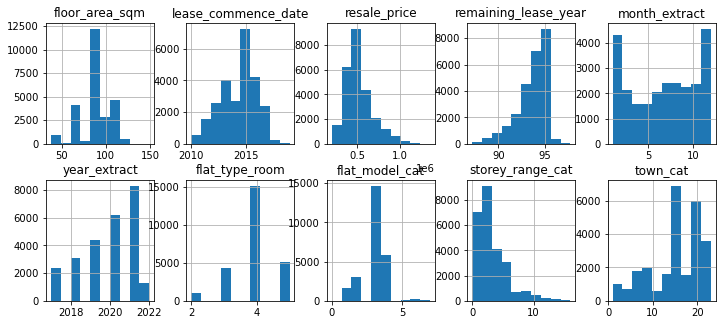

In [14]:
data = hdb_resale[["floor_area_sqm", "lease_commence_date", "resale_price", "remaining_lease_year", "month_extract", "year_extract", "flat_type_room", "flat_model_cat", "storey_range_cat", "town_cat"]]
data.hist(layout=(3, 5), figsize=(12, 8))
plt.show()

In [15]:
data.corr()

floor_area_sqm  lease_commence_date  resale_price  \
floor_area_sqm              1.000000             0.027751      0.563823   
lease_commence_date         0.027751             1.000000     -0.086399   
resale_price                0.563823            -0.086399      1.000000   
remaining_lease_year       -0.000868             0.688781     -0.241483   
month_extract               0.005895             0.031212     -0.002501   
year_extract                0.024847             0.523431      0.142265   
flat_type_room              0.985184             0.063589      0.589134   
flat_model_cat             -0.117870            -0.022897     -0.050229   
storey_range_cat           -0.004287            -0.115944      0.432515   
town_cat                    0.001523             0.112460     -0.329682   

                      remaining_lease_year  month_extract  year_extract  \
floor_area_sqm                   -0.000868       0.005895      0.024847   
lease_commence_date               0.688781       0.031212      0.523431   
resale_price                     -0.241483      -0.002501      0.142265   
remaining_lease_year              1.000000      -0.007599     -0.221164   
month_extract                    -0.007599       1.000000     -0.154439   
year_extract                     -0.221164      -0.154439      1.000000   
flat_type_room                    0.012240       0.007911      0.058049   
flat_model_cat                   -0.002610      -0.002509     -0.060321   
storey_range_cat                 -0.100246      -0.014048     -0.040738   
town_cat                          0.121699       0.007579     -0.005436   

                      flat_type_room  flat_model_cat  storey_range_cat  \
floor_area_sqm              0.985184       -0.117870         -0.004287   
lease_commence_date         0.063589       -0.022897         -0.115944   
resale_price                0.589134       -0.050229          0.432515   
remaining_lease_year        0.012240       -0.002610         -0.100246   
month_extract               0.007911       -0.002509         -0.014048   
year_extract                0.058049       -0.060321         -0.040738   
flat_type_room              1.000000       -0.163859          0.008169   
flat_model_cat             -0.163859        1.000000          0.044477   
storey_range_cat            0.008169        0.044477          1.000000   
town_cat                   -0.001460        0.059030         -0.202433   

                      town_cat  
floor_area_sqm        0.001523  
lease_commence_date   0.112460  
resale_price         -0.329682  
remaining_lease_year  0.121699  
month_extract         0.007579  
year_extract         -0.005436  
flat_type_room       -0.001460  
flat_model_cat        0.059030  
storey_range_cat     -0.202433  
town_cat              1.000000

In [16]:
scatter_matrix(data, figsize=(20, 20))
plt.show()

In [17]:
def bivariate(variable_one, variable_two):
    xs = data[variable_one]
    ys = data[variable_two]
    plt.figure(figsize=(8,5))
    m, b = np. polyfit(xs, ys, 1)
    plt.plot(xs,m*xs+b, color = 'red')
    plt.scatter(xs, ys, color='blue')
    plt.title(f"Plot of {variable_two} vs {variable_one}", fontsize=15)
    plt.xlabel(variable_one, fontsize=12)
    plt.ylabel(variable_two, fontsize=12)

    print("Correlation Coefficient:")
    print(np.corrcoef(data[variable_one], data[variable_two]))

Correlation Coefficient:
[[1.         0.56382337]
 [0.56382337 1.        ]]


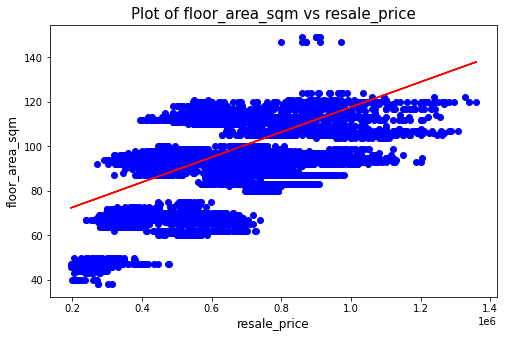

In [19]:
bivariate("resale_price", "floor_area_sqm")

In [21]:
bivariate("resale_price", "remaining_lease_year")

Correlation Coefficient:
[[ 1.         -0.24148274]
 [-0.24148274  1.        ]]


In [22]:
bivariate("resale_price", "flat_type_room")

Correlation Coefficient:
[[1.         0.58913437]
 [0.58913437 1.        ]]


Correlation Coefficient:
[[1.         0.43251477]
 [0.43251477 1.        ]]


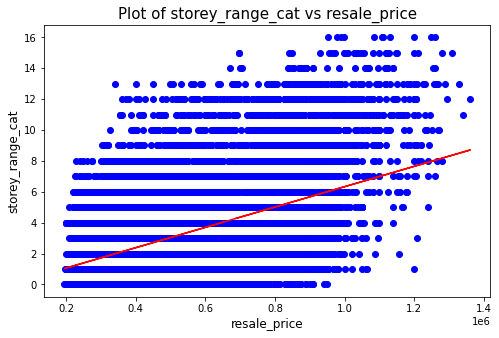

In [24]:
bivariate("resale_price", "storey_range_cat")

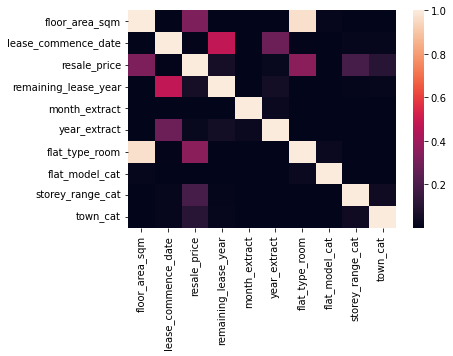

In [29]:
r2 = data.corr()**2
sns.heatmap(r2)
plt.show()

In [31]:
def corr_features(df, target, threshold):
    corr_features = []
    for feature in df.columns:
        if feature == target: continue
        x = df[feature]
        y = df[target]
        r2 = np.corrcoef(x,y)[0][1]
        if abs(r2)>=threshold:
            corr_features.append(feature)
    return corr_features

features_selected = corr_features(data, 'resale_price', 0.5) # Features that are correlated to price with correlation coefficient >= 0.5
print(f"Updated selected features: {features_selected}")

Updated selected features: ['floor_area_sqm', 'flat_type_room']


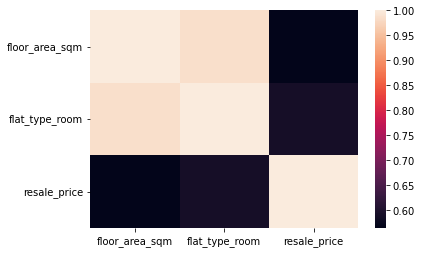

In [33]:
data[features_selected + ['resale_price']].corr()
r2 = abs(data[features_selected + ['resale_price']].corr())
sns.heatmap(r2)

plt.show()

In [35]:
X = data[features_selected]
y = data[["resale_price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
# Model fitting for Linear Regression
from sklearn.linear_model import LinearRegression

model1 = LinearRegression().fit(X_train, y_train)
model1_r2 = model1.score(X_train, y_train)
coef1 = model1.coef_
bias1 = model1.intercept_

print("Model 1: Linear Regression ")
print("--------------------------")
print(f"Features : {X_train.columns.tolist()}")
print(f"Coefficients: {coef1[0]}")
print(f"Intercept : {bias1[0]}")
print(f"Coeff of Determination : {model1_r2}")

Model 1: Linear Regression 
--------------------------
Features : ['floor_area_sqm', 'flat_type_room']
Coefficients: [ -5964.94572637 267540.39829429]
Intercept : -436.8702342957258
Coeff of Determination : 0.35817612976546076


In [37]:
# Model fitting for Ridge

from sklearn.linear_model import Ridge

model2 = Ridge().fit(X_train, y_train)
model2_r2 = model2.score(X_train, y_train)
coef2 = model2.coef_
bias2 = model2.intercept_

print("Model 2: Ridge Regression")
print("-------------------------")
print(f"Features : {X_train.columns.tolist()}")
print(f"Coefficients: {coef2[0]}")
print(f"Intercept : {bias2[0]}")
print(f"Coeff of Determination : {model2_r2}")

Model 2: Ridge Regression
-------------------------
Features : ['floor_area_sqm', 'flat_type_room']
Coefficients: [ -5926.4476178  266650.37928349]
Intercept : -403.4036588619929
Coeff of Determination : 0.358175675631747


In [38]:
def predict_on_x_test(x_test_copy, y_test_copy, intercept, floor_area, flat_type):
  formula1 = intercept + floor_area * x_test_copy['floor_area_sqm'] + flat_type * x_test_copy['flat_type_room']
  x_test_copy['Predicted_Price'] = round(formula1, 1)
  y_test_copy['Predicted_Price'] = x_test_copy['Predicted_Price']
  y_test_copy['Difference in %'] = round((y_test_copy['Predicted_Price'] - y_test_copy['resale_price']) / y_test_copy['resale_price'] * 100, 2)
  print(y_test_copy)

In [39]:
def model_evaluation(model):
  # predict based on test set
  y_pred = model.predict(X_test)

  # compare with ground truth
  mae = mean_absolute_error(y_test, y_pred)
  ave = np.mean(y_test["resale_price"])
  rmse = mean_squared_error(y_test, y_pred, squared = False)  # setting squared = False returns the square-root 

  return mae, ave, rmse

In [40]:
## Model 1 evaluation - Linear Regression
mae, ave, rmse = model_evaluation(model1)

print("Model 1 Evaluation - Linear Regression")
print("-----------------")
print(f"MAE: {mae:.5f}")
print(f"MAE as % of mean: {mae/ave*100:.5f}%")
print(f"RMSE: {rmse:.5f}")

X_test_copy1 = X_test.copy()    # Store a copy of X_test
y_test_copy1 = y_test.copy()   # Stores a copy of y_test

print()
print("Comparison of Actual vs Predicted Prices")
print()
predict_on_x_test(X_test_copy1, y_test_copy1, bias1[0], coef1[0][0], coef1[0][1])

Model 1 Evaluation - Linear Regression
-----------------
MAE: 96673.39972
MAE as % of mean: 18.67936%
RMSE: 133661.63902

Comparison of Actual vs Predicted Prices

       resale_price  Predicted_Price  Difference in %
18527      463888.0         514984.8            11.01
1489       681000.0         509019.8           -25.25
6662       755000.0         497089.9           -34.16
11668      399988.0         402533.0             0.64
10824      445000.0         514984.8            15.73
...             ...              ...              ...
4153       480000.0         390603.1           -18.62
9525       608888.0         663226.3             8.92
2943       348000.0         514984.8            47.98
20111      530000.0         669191.2            26.26
19200      485000.0         514984.8             6.18

[6409 rows x 3 columns]


In [41]:
## Model 2 evaluation - Ridge


mae, ave, rmse = model_evaluation(model2)

print("Model 2 Evaluation - Ridge")
print("-----------------")
print(f"MAE: {mae:.5f}")
print(f"MAE as % of mean: {mae/ave*100:.5f}%")
print(f"RMSE: {rmse:.5f}")

X_test_copy2 = X_test.copy()    # Store a copy of X_test
y_test_copy2 = y_test.copy()   # Stores a copy of y_test

print()
print("Comparison of Actual vs Predicted Prices")
print()
predict_on_x_test(X_test_copy2, y_test_copy2, bias2[0], coef2[0][0], coef2[0][1])

Model 2 Evaluation - Ridge
-----------------
MAE: 96678.33357
MAE as % of mean: 18.68031%
RMSE: 133659.00451

Comparison of Actual vs Predicted Prices

       resale_price  Predicted_Price  Difference in %
18527      463888.0         515038.5            11.03
1489       681000.0         509112.0           -25.24
6662       755000.0         497259.1           -34.14
11668      399988.0         402475.7             0.62
10824      445000.0         515038.5            15.74
...             ...              ...              ...
4153       480000.0         390622.8           -18.62
9525       608888.0         663159.9             8.91
2943       348000.0         515038.5            48.00
20111      530000.0         669086.4            26.24
19200      485000.0         515038.5             6.19

[6409 rows x 3 columns]


In [ ]:
Coefficients: [ -5964.94572637 267540.39829429]
Intercept : -436.8702342957258

In [42]:
y_test_copy1["Predicted Price"] = -436.8702342957258 + -5964.94572637 * data["floor_area_sqm"] + 267540.3982942 * data["flat_type_room"]
y_test_copy1["Difference in Price"] = y_test_copy1["Predicted Price"] - y_test_copy1["resale_price"]
y_test_copy1[["Predicted Price", "resale_price", "Difference in Price"]]

Predicted Price  resale_price  Difference in Price
18527    514984.770390      463888.0         51096.770390
1489     509019.824664      681000.0       -171980.175336
6662     497089.933211      755000.0       -257910.066789
11668    402532.960982      399988.0          2544.960982
10824    514984.770390      445000.0         69984.770390
...                ...           ...                  ...
4153     390603.069529      480000.0        -89396.930471
9525     663226.254157      608888.0         54338.254157
2943     514984.770390      348000.0        166984.770390
20111    669191.199883      530000.0        139191.199883
19200    514984.770390      485000.0         29984.770390

[6409 rows x 3 columns]

In [44]:
from scipy import stats

n = y_test_copy1.shape[0]
alpha = 0.05
mu = 0
var = y_test_copy1.var()["Difference in Price"]
test_statistic = (y_test_copy1.mean()["Difference in Price"] - mu) / np.sqrt(var / n)

degree_of_freedom = n - 1
t_critical = stats.t.isf(alpha / 2, degree_of_freedom)        # Two-sided --> a / 2
p_value = stats.t.sf(abs(test_statistic), degree_of_freedom)

print(f"t value : {test_statistic}")
print(f"critical value : {t_critical}")
print(f"p value : {p_value}")

t value : -1.5334644795255215
critical value : 1.9603342579104313
p value : 0.06260540947862532
